In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin

In [ ]:
start_date = '2024-02-28'
end_date = '2025-02-28'

In [ ]:
ticker = 'SBUX'
df_yf = yfin.download(ticker, start=start_date, end=end_date)['Close']
df_yf

[*********************100%***********************]  1 of 1 completed


Ticker,SBUX
Date,
2024-02-28,90.689026
2024-02-29,92.541817
2024-03-01,90.845055
2024-03-04,90.162437
2024-03-05,88.953262
...,...
2025-02-21,111.750000
2025-02-24,113.190002
2025-02-25,114.589996


<Axes: xlabel='Date'>

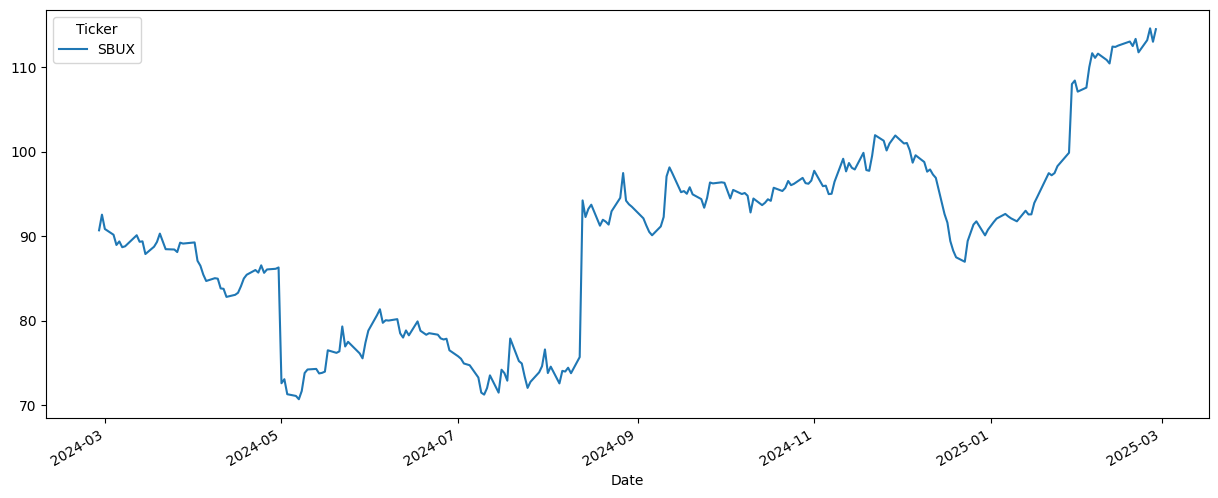

In [ ]:
df_yf.plot(figsize=(15,6))

In [ ]:
stock_returns = np.log(1 + df_yf.pct_change())
stock_returns.tail()

Ticker,SBUX
Date,
2025-02-21,-0.014128
2025-02-24,0.012804
2025-02-25,0.012293
2025-02-26,-0.013973
2025-02-27,0.013100


<ipython-input-8-d09f3c46e84e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_returns.iloc[1:])


Text(0, 0.5, 'Frequency')

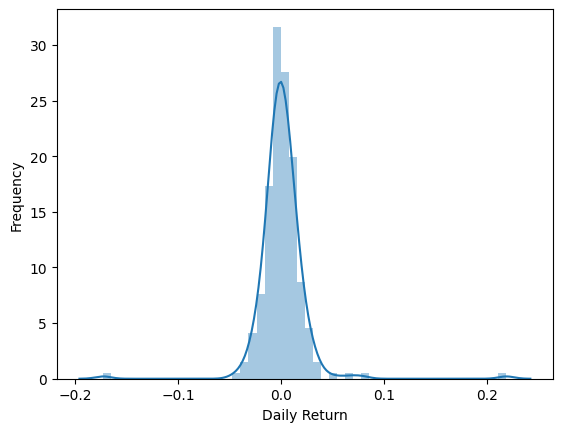

In [ ]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

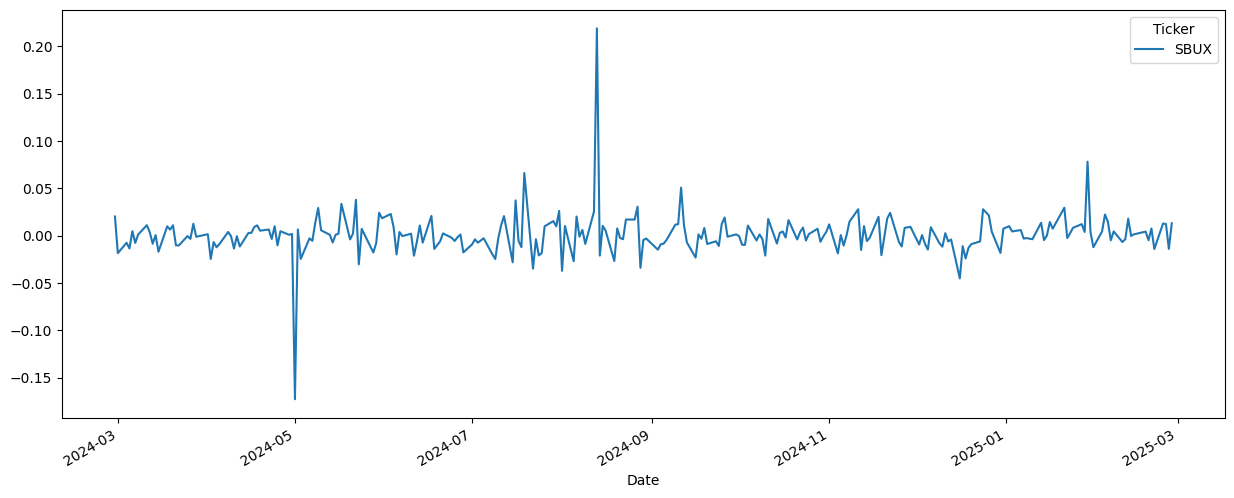

In [ ]:
stock_returns.plot(figsize=(15,6))

In [ ]:
u = stock_returns.mean()
var = stock_returns.var()

Calculate the drift, using the following formula:

$$
drift = u - \frac{1}{2} \cdot var
$$
It is best approximation of feture rate of return of the stock


In [ ]:
drift = u - (0.5*var)
drift

,0
Ticker,
SBUX,0.000659


In [ ]:
stddev = stock_returns.std()
stddev

,0
Ticker,
SBUX,0.023386


In [ ]:
type(drift)

pandas.core.series.Series

In [ ]:
type(stddev)

pandas.core.series.Series

In [ ]:
np.array(drift)

array([0.00065876])

In [ ]:
type(drift)

pandas.core.series.Series




$$
daily\_returns = exp({drift} + {stdev} * z),
$$


$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

$$
Z -  Corresponds to the distance between the mean and event, expressed as the number of Standard deviations
$$

In [ ]:
x = np.random.rand(10,2)
x

array([[0.72926255, 0.92603395],
       [0.13169366, 0.45080764],
       [0.44399726, 0.87331124],
       [0.97407147, 0.79804873],
       [0.92103605, 0.55586682],
       [0.81116582, 0.88656508],
       [0.8126636 , 0.81871727],
       [0.31251459, 0.90372003],
       [0.68082804, 0.83822118],
       [0.99144172, 0.35351801]])

In [ ]:
norm.ppf(x)

array([[ 0.61058417,  1.4468744 ],
       [-1.1184208 , -0.1236211 ],
       [-0.14084231,  1.14218408],
       [ 1.94431848,  0.83467177],
       [ 1.41207496,  0.14049823],
       [ 0.88220056,  1.2084614 ],
       [ 0.88775453,  0.91048751],
       [-0.48873521,  1.3030434 ],
       [ 0.47001553,  0.98717341],
       [ 2.38419444, -0.37583976]])

In [ ]:
stdev = stock_returns.std()
days = 30
iterations = 100
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials
Z


array([[-0.26872144, -0.16489716,  0.41742059, ...,  2.79372903,
        -0.82729612, -0.52714661],
       [-1.0418372 ,  1.50771075, -1.80750765, ...,  0.31016146,
         2.06096207, -1.5037096 ],
       [ 0.69627011,  0.96472078,  1.12367335, ...,  1.10775847,
         1.13561964, -1.5045927 ],
       ...,
       [-0.41133922,  0.33611629, -1.42186421, ..., -1.20125593,
         0.18279519, -0.1876765 ],
       [ 0.60456886,  0.77576702, -1.19082443, ..., -0.29382754,
         1.96143923, -0.50400062],
       [ 0.73333231,  0.80839548,  0.03819909, ...,  0.8038394 ,
         1.51977328,  2.32004675]])

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [ ]:
drift = np.full((days, iterations), drift)  # Broadcast drift to (250, 100)

# Convert stdev to have the same shape as Z
stdev = np.full((days, iterations), stdev)  # Broadcast stdev to (250, 100)

In [ ]:
drift

array([[0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876],
       [0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876],
       [0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876],
       ...,
       [0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876],
       [0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876],
       [0.00065876, 0.00065876, 0.00065876, ..., 0.00065876, 0.00065876,
        0.00065876]])

In [ ]:
get_daily_returns = np.exp(drift + stdev * Z)

In [ ]:
get_daily_returns

array([[0.99439036, 0.99680766, 1.01047485, ..., 1.06821779, 0.98148553,
        0.98839897],
       [0.97657359, 1.03657022, 0.95924305, ..., 1.00794344, 1.05006859,
        0.96608225],
       [1.01708574, 1.02349095, 1.02730254, ..., 1.02692028, 1.02758958,
        0.96606229],
       ...,
       [0.9910794 , 1.00855542, 0.9679331 , ..., 0.97293961, 1.00494572,
        0.99627679],
       [1.01490695, 1.01897834, 0.97317698, ..., 0.9938067 , 1.04762751,
        0.98893411],
       [1.01796765, 1.01975615, 1.00155327, ..., 1.01964751, 1.03686267,
        1.0564501 ]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$


get_daily_returns=daily\_return<br>
S_0=? - It will be the current stock price

In [ ]:
S0 = df_yf.iloc[-1]
S0

,2025-02-27
Ticker,
SBUX,114.489998


In [ ]:
price_paths = np.zeros_like(get_daily_returns)

In [ ]:
price_paths.shape

(30, 100)

In [ ]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
price_paths[0] = S0
price_paths

array([[114.48999786, 114.48999786, 114.48999786, ..., 114.48999786,
        114.48999786, 114.48999786],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [ ]:
price_paths

array([[114.48999786, 114.48999786, 114.48999786, ..., 114.48999786,
        114.48999786, 114.48999786],
       [111.80790834, 118.67692277, 109.82373515, ..., 115.39944238,
        120.22235071, 110.60675425],
       [113.7182291 , 121.46475658, 112.82220251, ..., 118.50602718,
        123.53923515, 106.85301481],
       ...,
       [112.12257055, 127.89268134, 133.5802572 , ..., 116.56305048,
        123.51519554, 120.05241134],
       [113.79397634, 130.31987216, 129.99723194, ..., 115.84114088,
        129.3979164 , 118.72392516],
       [115.83858663, 132.89449143, 130.1991533 , ..., 118.11713049,
        134.16786915, 125.42590234]])

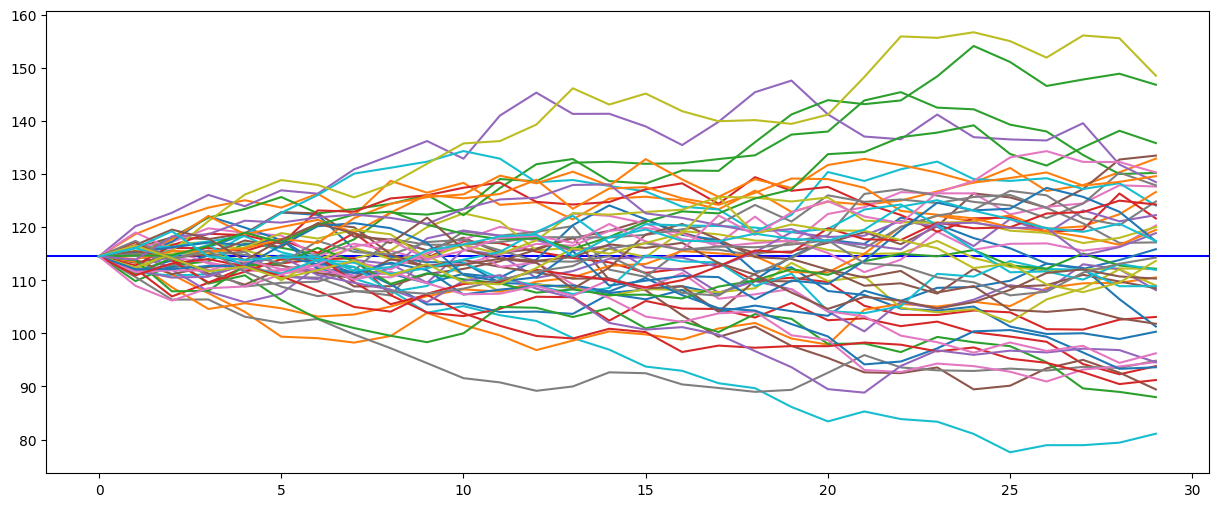

In [ ]:
plt.figure(figsize=(15,6))
plt.axhline(y = 114.48, color = 'b', linestyle = '-')
plt.plot(pd.DataFrame(price_paths).iloc[:,0:50])

### Probability of Stock Price Exceeding a Threshold
We calculate the probability that the stock price at the last simulated day (250th day) is greater than a given threshold.

In [ ]:
import numpy as np

final_prices = price_paths[-1, :]  # Get the final stock prices for all simulations
threshold = 150  # Set the stock price threshold

# Compute probability
prob = np.mean(final_prices > threshold)

print(f"Probability of stock price > {threshold}: {prob * 100:.2f}%")



Probability of stock price > 150: 1.00%


### Confidence Interval (95%)
We compute the mean final stock price and the 95% confidence interval (between the 2.5th and 97.5th percentiles).

In [ ]:
# Compute mean and confidence intervals
mean_price = np.mean(final_prices)
conf_interval = np.percentile(final_prices, [2.5, 97.5])  # 95% CI

print(f"Expected price: {mean_price:.2f}")
print(f"95% Confidence Interval: {conf_interval[0]:.2f} to {conf_interval[1]:.2f}")


Expected price: 116.46
95% Confidence Interval: 90.28 to 147.69
